# Series expansions of verious functions

You can view these sheets on github, but to modify them, you'll need to a version of jupyter. How to install it is explained here: http://jupyter.readthedocs.io/en/latest/install.html.
If you want to use the functions defined below to generate your own distributions, you need to compile them first. Easiest done by clicking (once have opened this as jupyter notebook): Kernel -> Restart & Run All. (Alternatively, you can use the >| button to click your way through, but you need to start from the beginning to have access to all functions defined on this sheet). Have fun!

Start by importing the relevant libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Let us define a few functions, and their series expansion. Defining the functions as classes allows us a convenient way to set up parameters and then pass them to a generic "draw" routine. The __call__ method is the one used when you use the class as if it were a function, as in
classInstance = class(parameter1, parameter2)
y=classInstance(x)
That classInstance(x) executes the __call__ method.

In [2]:
class expoClass:
    def __init__(self, tau=1.6):
        self._tau=tau
    def __call__(self, t):
        #return expo(t, self._tau)
        return np.exp(-t/self._tau)/self._tau

class expoSeries:
    def __init__(self, order=0, tau=1.6):
        self._order=order
        self._tau=tau
    def __call__(self, t):
        sum=0
        element=0*t + 1  #this is an easy way to create a numpy array of ones with the same dimensions as t (which is itself a numpy array)
        for n in range(0, self._order+1):
            sum += element
            element *= (-t/self._tau)/(n+1)
        return sum/self._tau
    
class sinClass:
    def __init__(self, period=2*np.pi):
        self._period=period
    def __call__(self, t):
        #return expo(t, self._tau)
        return np.sin(t * 2*np.pi/self._period)
    
class sinSeries:
    def __init__(self, order=0, period=2*np.pi):
        self._order=order
        self._period=period
    def __call__(self, t):
        sum=0*t   #this is an easy way to create a numpy array of zeros with the same dimensions as t (which is itself a numpy array)
        element=t * 2*np.pi/self._period
        for n in range(0, self._order):
            sum += element
            m = 2*n+1
            x = t * 2*np.pi/self._period
            element *= -x*x/((m+1)*(m+2))
        return sum


Let's define a class to draw functions

In [3]:
def draw(somethingLikeExpoClass, mini=-10, maxi=10, scale=1.0, numPoints=1000, label=" "):
    tArray=np.arange(mini, maxi, (maxi-mini)/numPoints)
    plt.plot(tArray,scale*somethingLikeExpoClass(tArray), label=label)
    plt.legend(loc="lower left")

...let's create an instance of our expoClass:

In [4]:
timeFct = expoClass(1.6)  
# timeFct is now defined such that timeFct(t) will call whetever is in 
# the __call__ routine of expoClass, currently return expo(t, self._tau)

... and draw it:

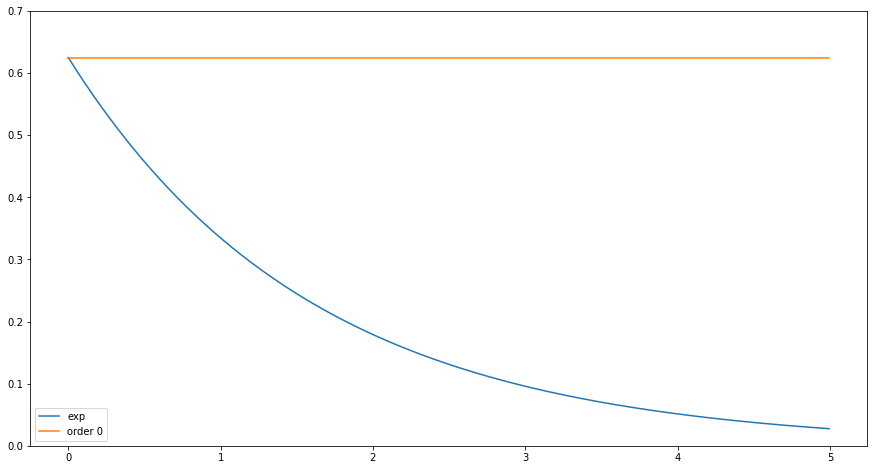

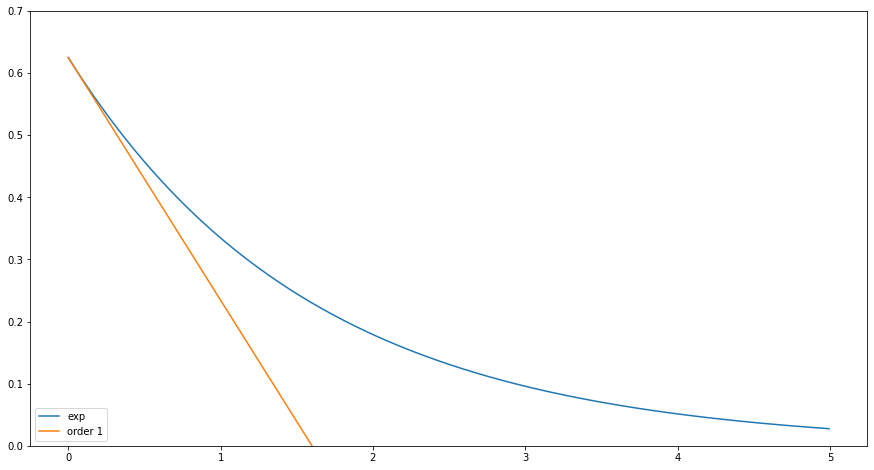

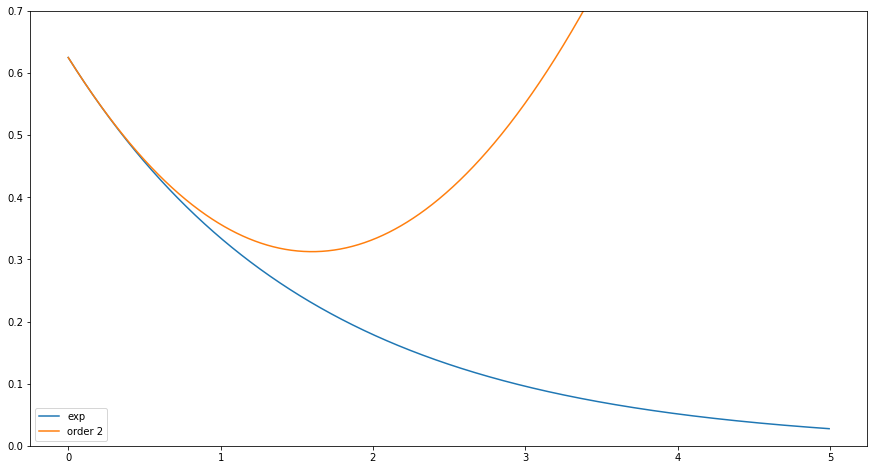

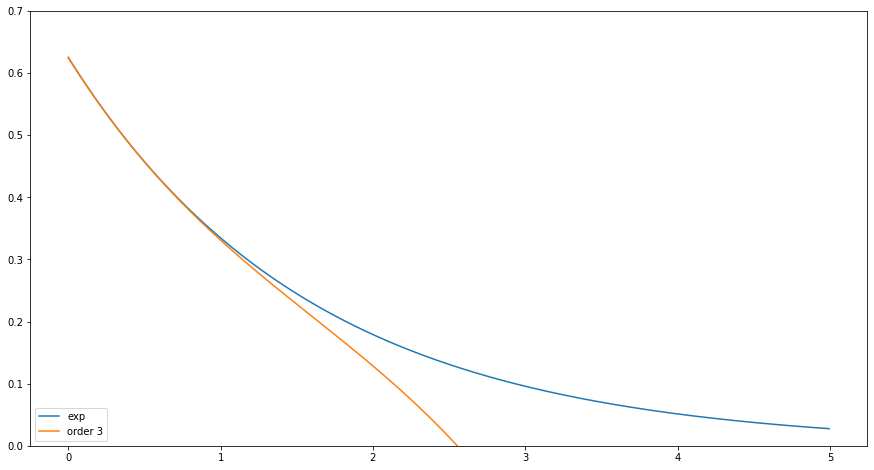

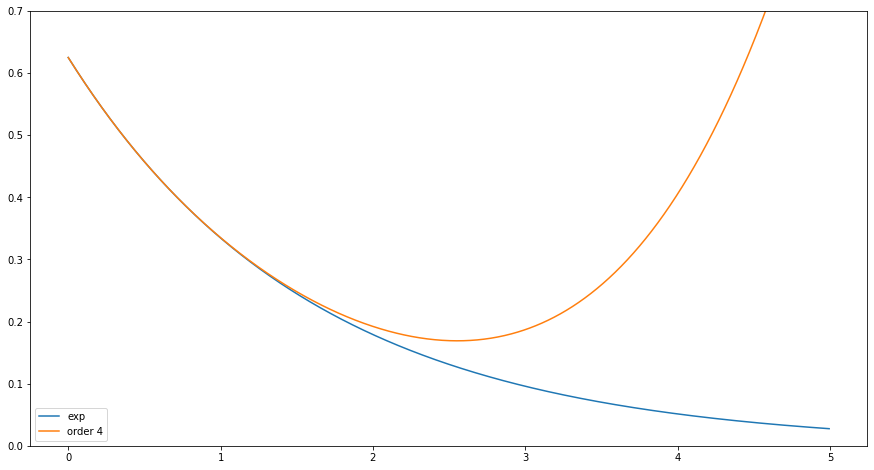

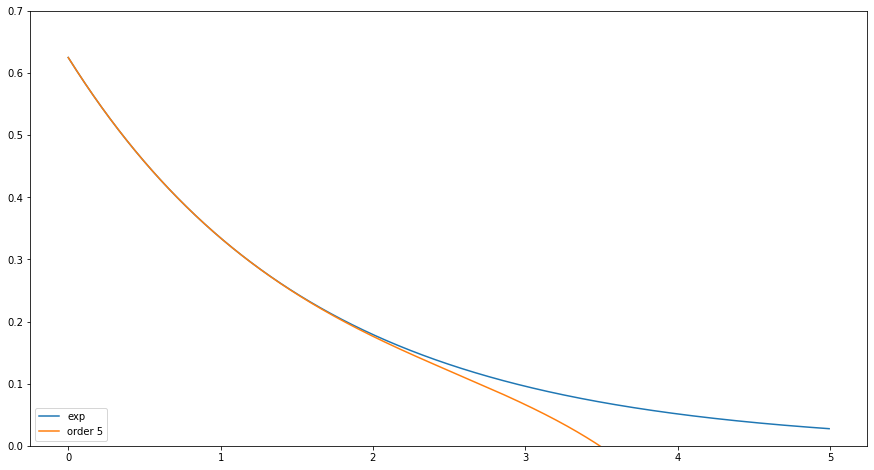

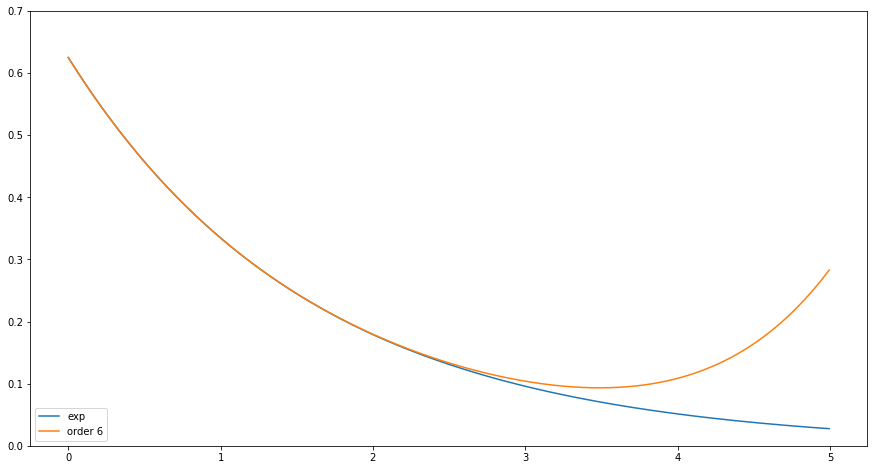

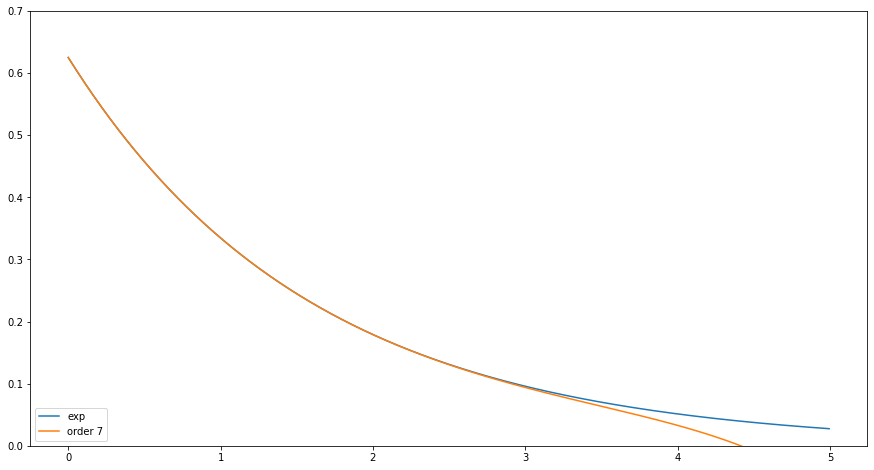

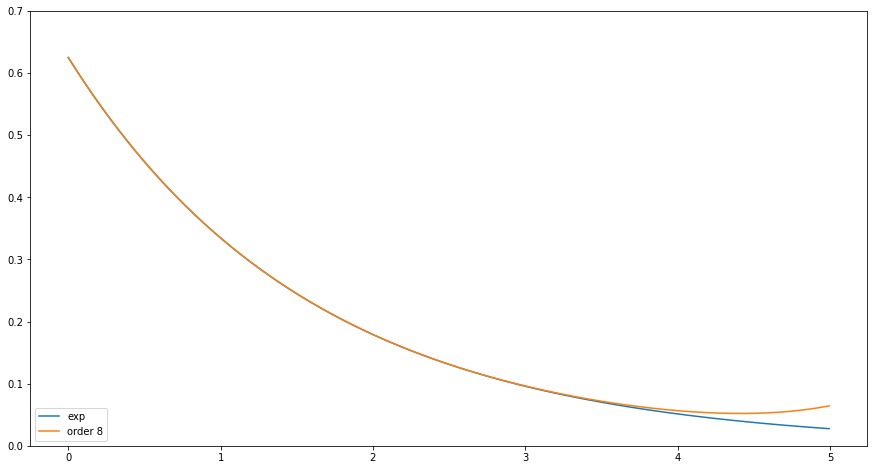

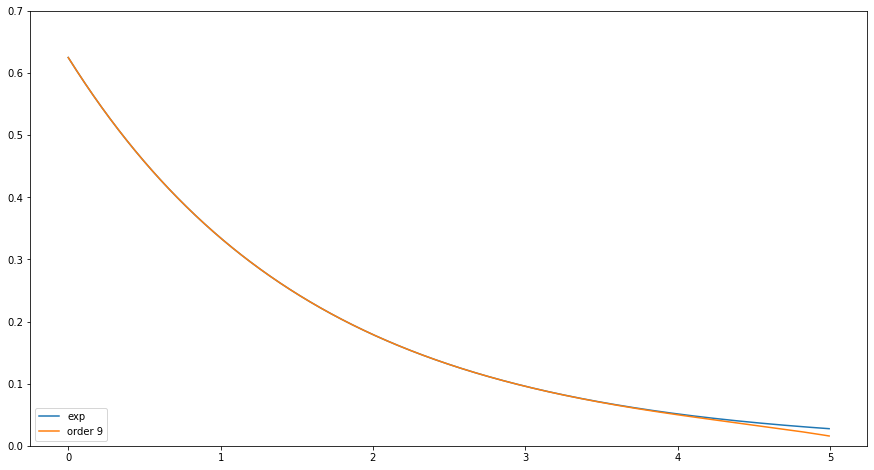

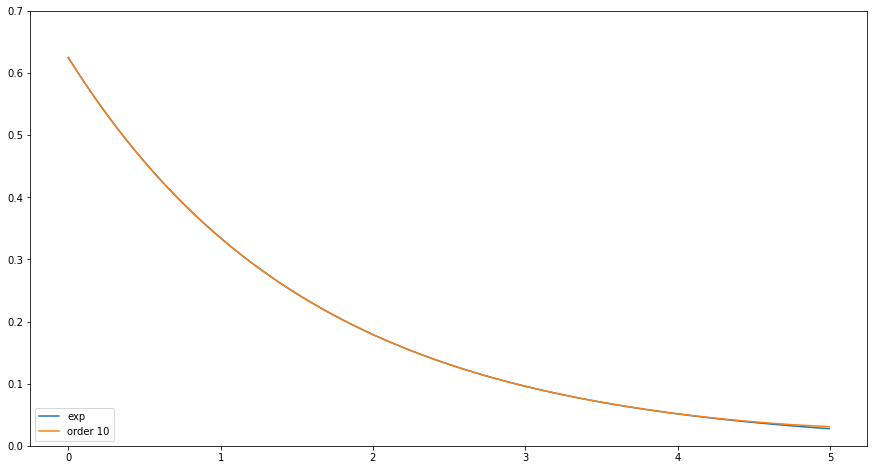

In [5]:
mini=0
maxi=5
for n in range(0, 11):
    plt.figure(figsize=(15,8))
    draw(timeFct, mini, maxi, label="exp")
    expoSeriesFct=expoSeries(n)
    draw(expoSeriesFct, mini, maxi, label="order " + str(n))
    plt.ylim(0, 0.7)
    plt.show()

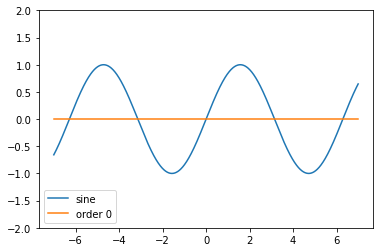

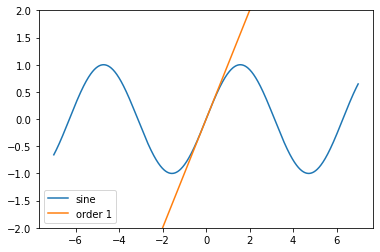

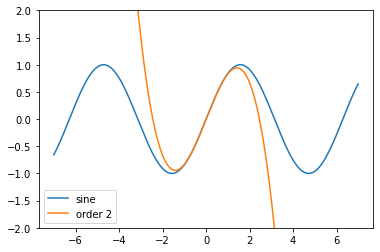

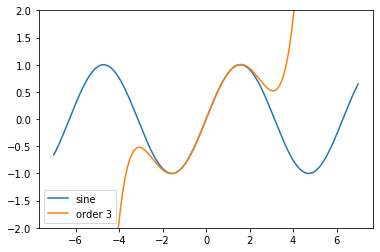

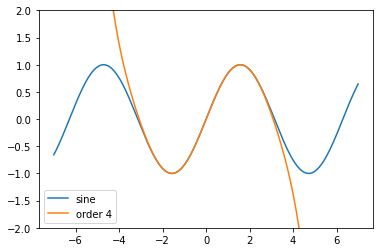

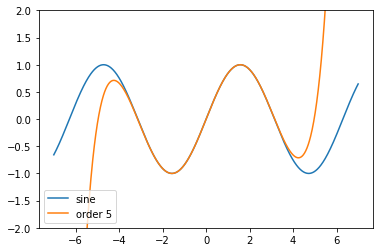

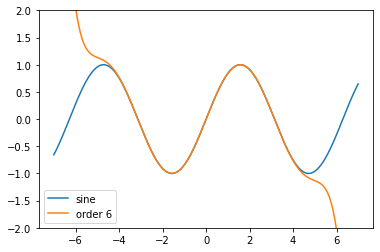

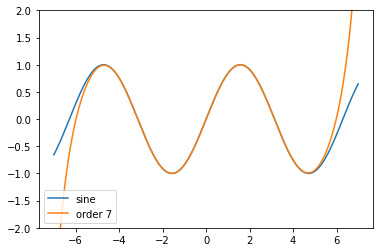

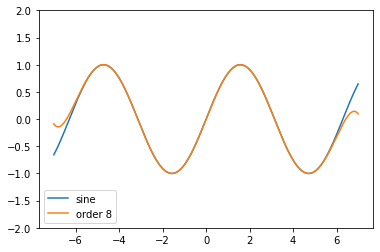

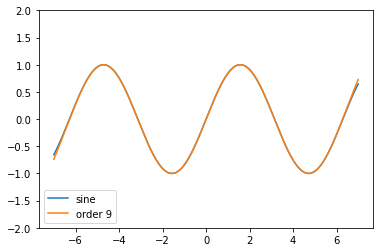

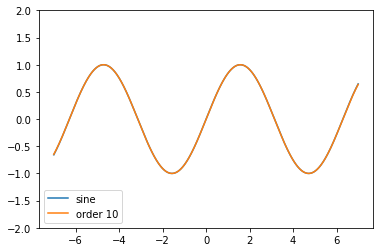

In [6]:
sinFct = sinClass()
mini=-7
maxi=7
for n in range(0, 11):
    #plt.figure(figsize=(15,8))
    draw(sinFct, label="sine", mini=mini, maxi=maxi)
    sinSeriesFct=sinSeries(n)
    draw(sinSeriesFct, mini, maxi, label="order " + str(n))
    plt.ylim(-2, 2)
    plt.show()

It is of course a little bit silly, in practice, to expand a periodic function beyond one period. But it looks good.

## Logarithm
The Taylor series for $\ln(x)$, developed around $x_0=1$, converges slowly. It's 
$$ S_{\ln \mathrm{Taylor}} = \sum\limits_{n=1}^{\infty} \frac{(-1)^{n-1}}{n}(x-1)^n $$. 
Another series expansion of 
$ \ln(x) $ has a larger radius of convergence and converges much more quickly. It's \
$$ 
S_{\ln \mathrm{fast}} = \sum\limits_{n=1}^{\infty} \frac{1}{2n+1}\left(\frac{x-1}{x+1}\right)^{2n+1}. 
$$ 
The faster converging series is obtained from the Taylor series like this:
$$
\ln(x) = \ln\frac{1+\frac{x-1}{x+1}}{1-\frac{x-1}{x+1}} 
   = \ln(1 + \frac{x-1}{x+1}) - \ln(1 - \frac{x-1}{x+1})
= \sum\limits_{n=1}^{\infty} \frac{(-1)^{n-1}}{n}\left(\frac{x-1}{x+1}\right)^n - \sum\limits_{n=1}^{\infty}\frac{(-1)^{n-1}}{n}\left(-\frac{x-1}{x+1}\right)^n
$$
Now we use $\left(-\frac{x-1}{x+1}\right)^n =(-1)^n \left(\frac{x-1}{x+1}\right)^n $
$$
\ln(x) = \sum\limits_{n=1}^{\infty} \frac{(-1)^{n-1}}{n}\left(\frac{x-1}{x+1}\right)^n 
     - \sum\limits_{n=1}^{\infty}\frac{(-1)^{n-1}(-1)^n}{n}\left(\frac{x-1}{x+1}\right)^n
= \sum\limits_{n=1}^{\infty} \frac{(-1)^{n-1}}{n}\left(\frac{x-1}{x+1}\right)^n 
     - \sum\limits_{n=1}^{\infty}\frac{(-1)^{2n-1}}{n}\left(\frac{x-1}{x+1}\right)^n
$$
Using that $(-1)^{2n-1} = -1$:
$$
\ln(x) = \sum\limits_{n=1}^{\infty} \frac{(-1)^{n-1}}{n}\left(\frac{x-1}{x+1}\right)^n 
     + \sum\limits_{n=1}^{\infty}\frac{1}{n}\left(\frac{x-1}{x+1}\right)^n
$$
Now the terms with even $n$ (odd $n-1$) cancel, and the ones with odd $n$ add up and we get
$$
 \ln(x) = 2\sum\limits_{n=1}^{\infty}  \frac{1}{2n+1}\left(\frac{x-1}{x+1}\right)^{2n+1}
= 2\frac{x-1}{x+1}\sum\limits_{n=1}^{\infty}  \frac{1}{2n+1}\left(\frac{x-1}{x+1}\right)^{2n}
$$

In [7]:
class lnClass:
    def __init__(self):
        return
    def __call__(self, t):
        #return expo(t, self._tau)
        return np.log(t)

class lnSeries:
    def __init__(self, order=0):
        self._order=order
        
    def __call__(self, t):
        delta_t = t-1         #we expand this around t=1; never around 0
        sum=0.0*delta_t
        if 0==self._order : return sum
        
        element = delta_t
        for n in range(1, self._order+1):
            sum += element/n
            element *= -delta_t
        return sum
    
class betterLnSeries:
    def __init__(self, order=0):
        self._order=order
        
    def __call__(self, t):
        sum=0*t 
        factor = (t-1)/(t+1)
        element=factor
        for n in range(0, self._order+1):
            sum += element/(2*n+1)
            element *= factor*factor
        return 2*sum



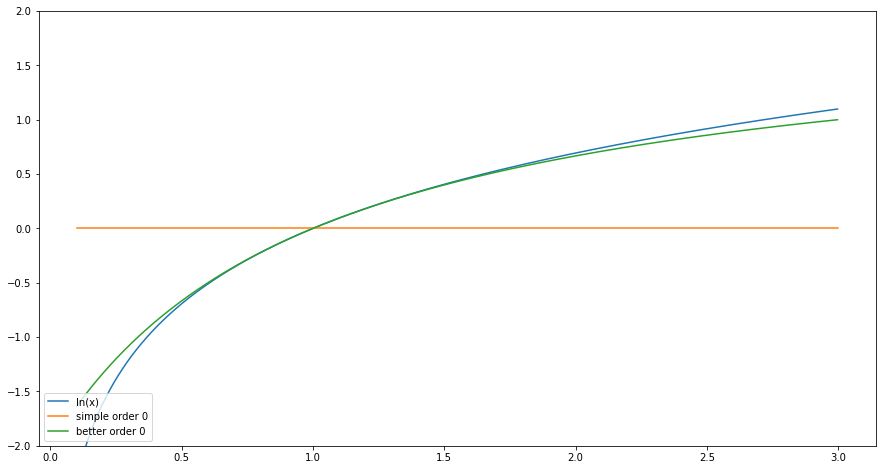

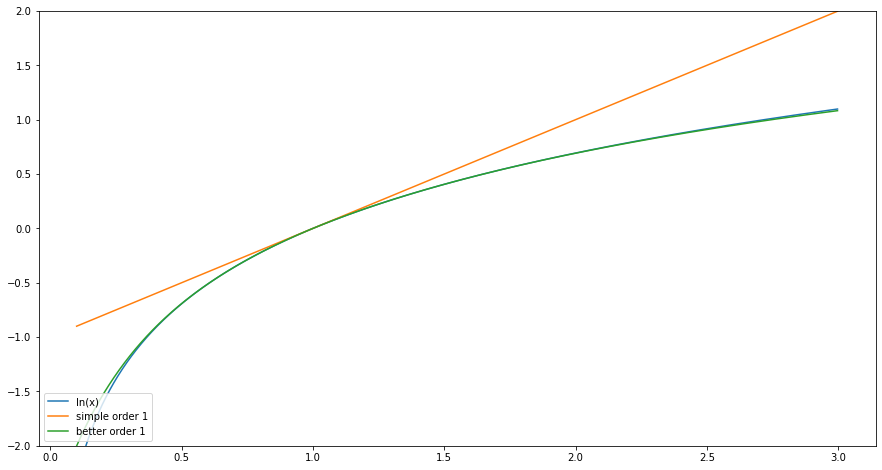

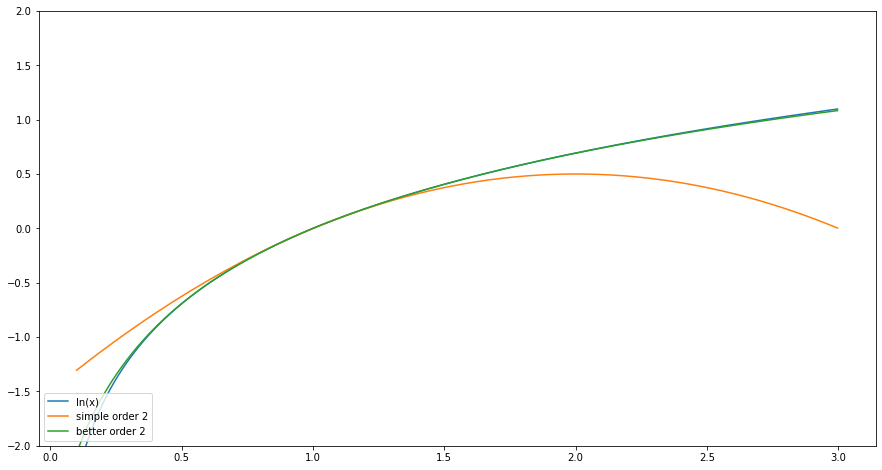

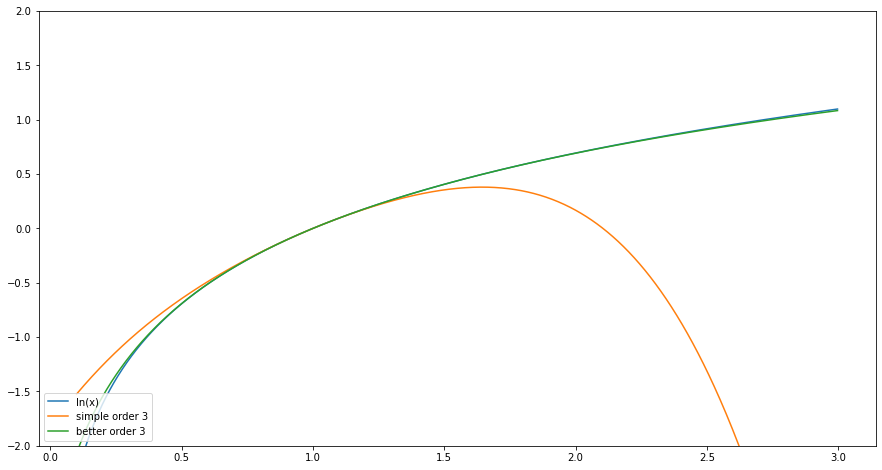

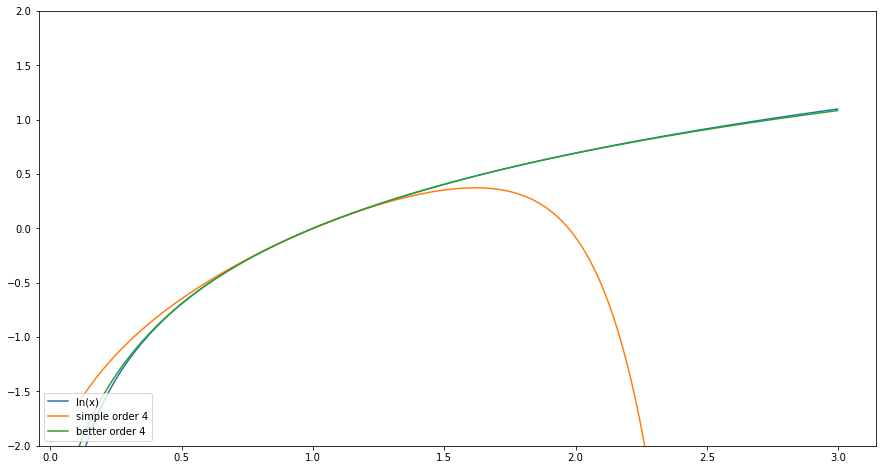

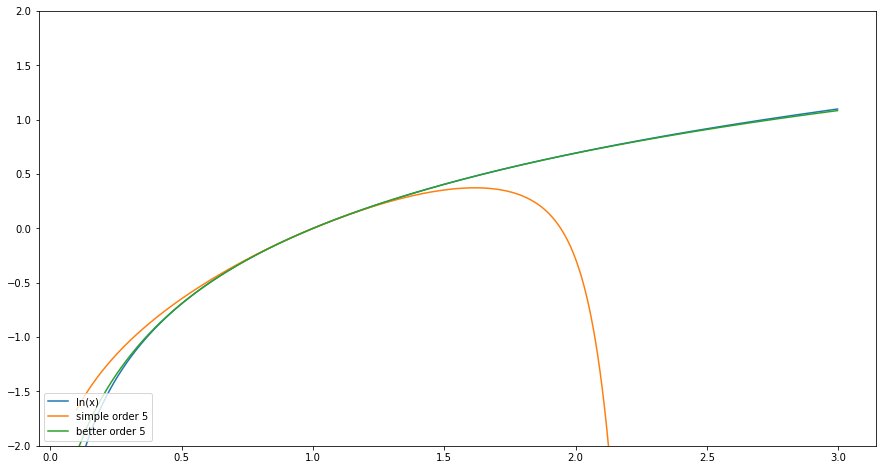

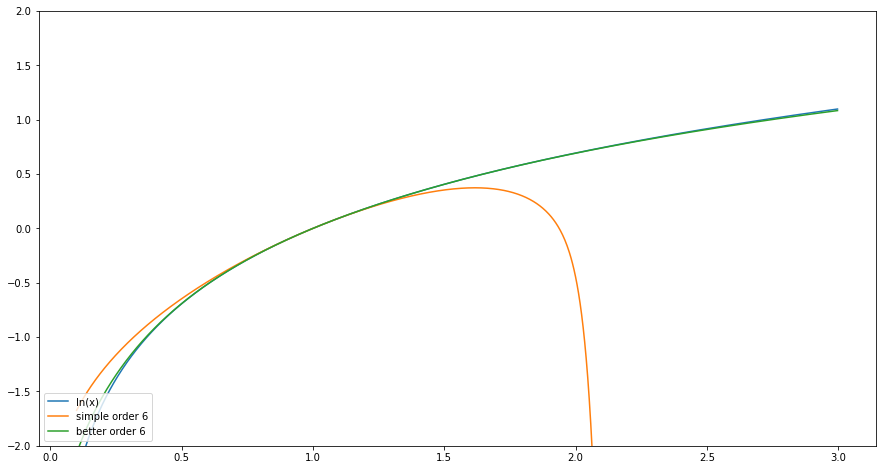

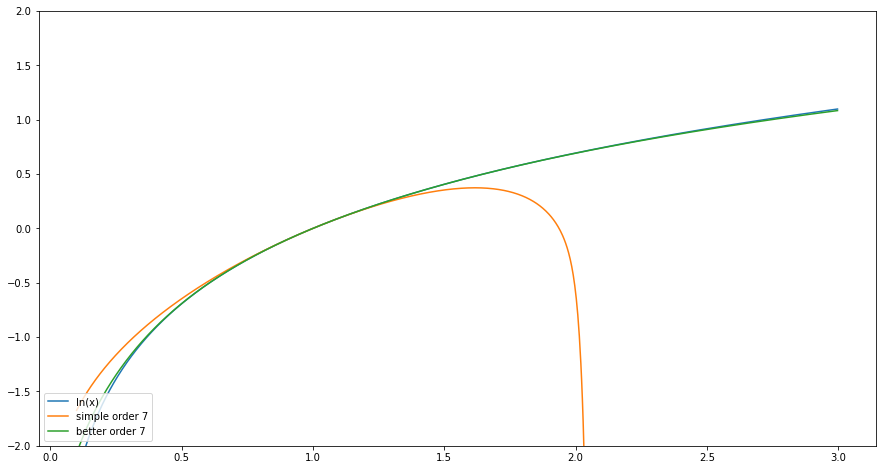

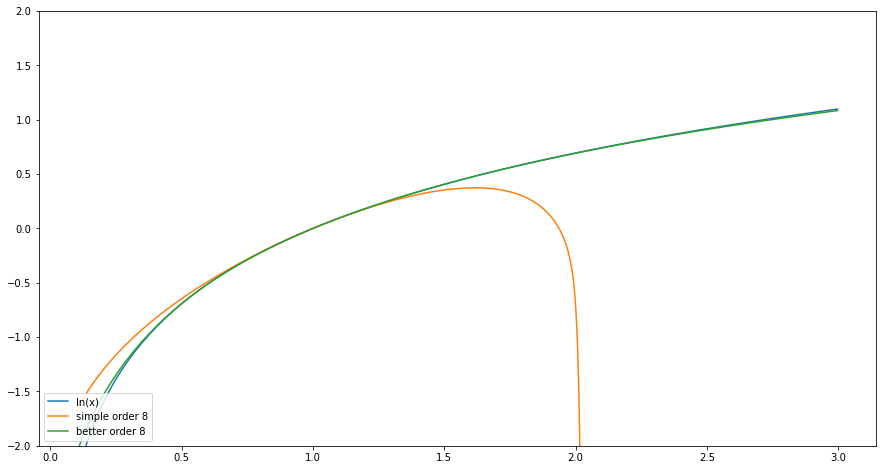

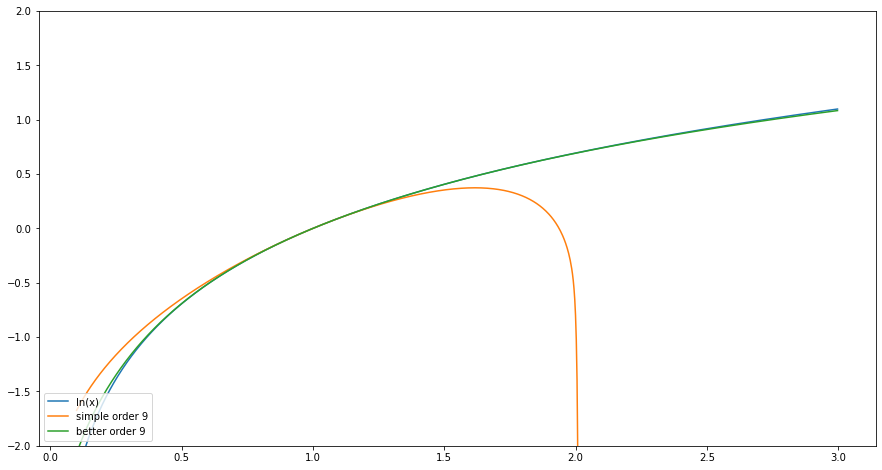

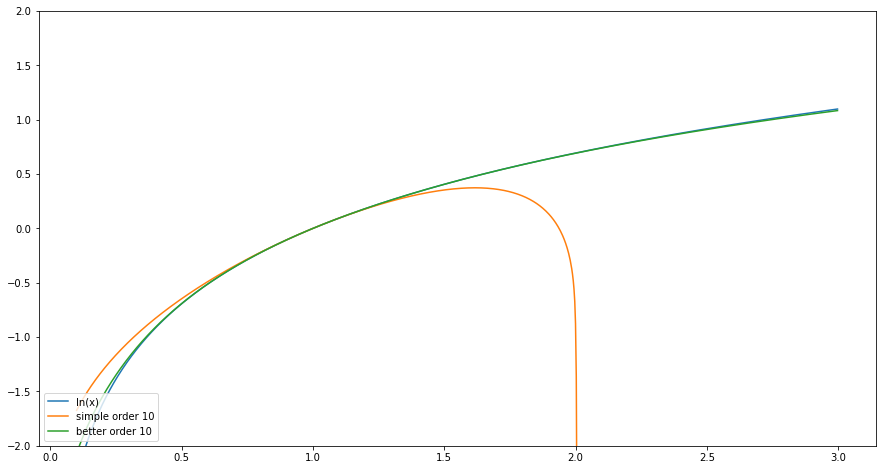

In [8]:
lnFct = lnClass()
mini=0.1 # Note: ln(0) undefined
maxi=3 # Note: simple series diverges for x > 2
for n in range(0, 11, 1):
    plt.figure(figsize=(15,8))
    draw(lnFct, label="ln(x)", mini=mini, maxi=maxi)
    lnSeriesFct=lnSeries(n)
    draw(lnSeriesFct, mini, maxi, label="simple order " + str(n))
    betterLnSeriesFct=betterLnSeries(n)
    draw(betterLnSeriesFct, mini, maxi, label="better order " + str(n))
    plt.ylim(-2, 2)
    plt.show()